# mid term analysis



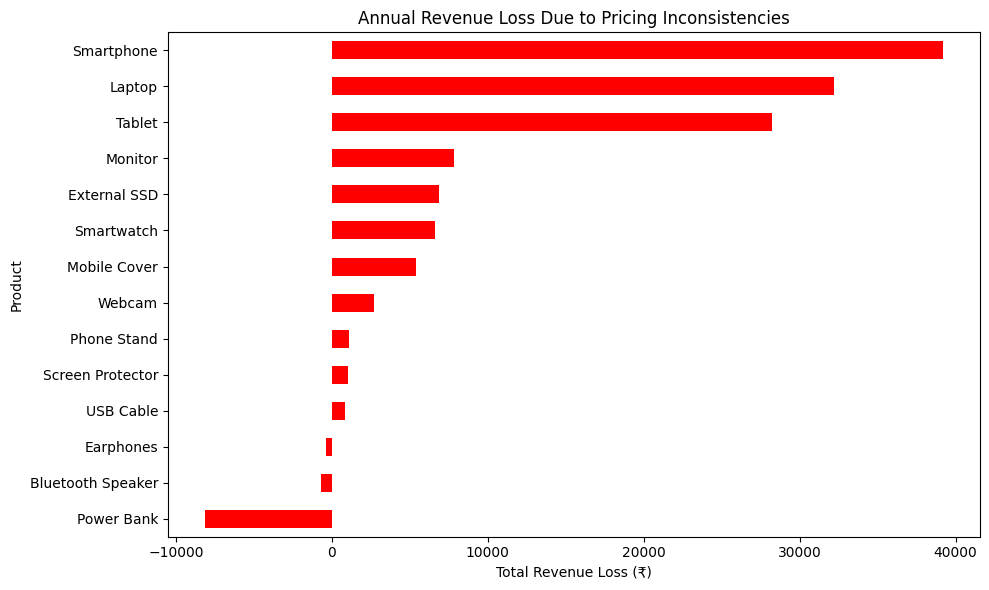

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet2')

# Convert price columns to numeric, coercing errors to NaN
df['Base_Price(₹)'] = pd.to_numeric(df['Base_Price(₹)'], errors='coerce')
df['Avg_Selling_Price(₹)'] = pd.to_numeric(df['Avg_Selling_Price(₹)'], errors='coerce')

# Calculate Revenue_Loss, handling potential NaN values after coercion
df['Revenue_Loss'] = (df['Base_Price(₹)'] - df['Avg_Selling_Price(₹)']) * df['Units_Sold']

# Drop rows where Revenue_Loss is NaN (due to coercion errors)
df.dropna(subset=['Revenue_Loss'], inplace=True)

loss_by_product = df.groupby('Product')['Revenue_Loss'].sum().sort_values()

plt.figure(figsize=(10,6))
loss_by_product.plot(kind='barh', color='red')
plt.xlabel('Total Revenue Loss (₹)')
plt.ylabel('Product')
plt.title('Annual Revenue Loss Due to Pricing Inconsistencies')
plt.tight_layout()
plt.show()

# New Section

In [ ]:
df

,Week Start,Product,Units_Sold,Base_Price(₹),Avg_Selling_Price(₹),Weekly_Revenue(₹),Revenue_Loss
0,2025-02-24,Bluetooth Speaker,3,4300,4420,13260,-360
1,2025-02-24,Earphones,8,2500,2380,19040,960
2,2025-02-24,External SSD,0,6500,0,0,0
3,2025-02-24,Laptop,1,55000,53500,53500,1500
4,2025-02-24,Mobile Cover,13,800,760,9880,520
...,...,...,...,...,...,...,...
177,2025-05-19,Smartphone,4,22000,21200,84800,3200
178,2025-05-19,Smartwatch,2,8000,7852,15704,296
179,2025-05-19,Tablet,1,25000,24900,24900,100
180,2025-05-19,USB Cable,4,350,320,1280,120


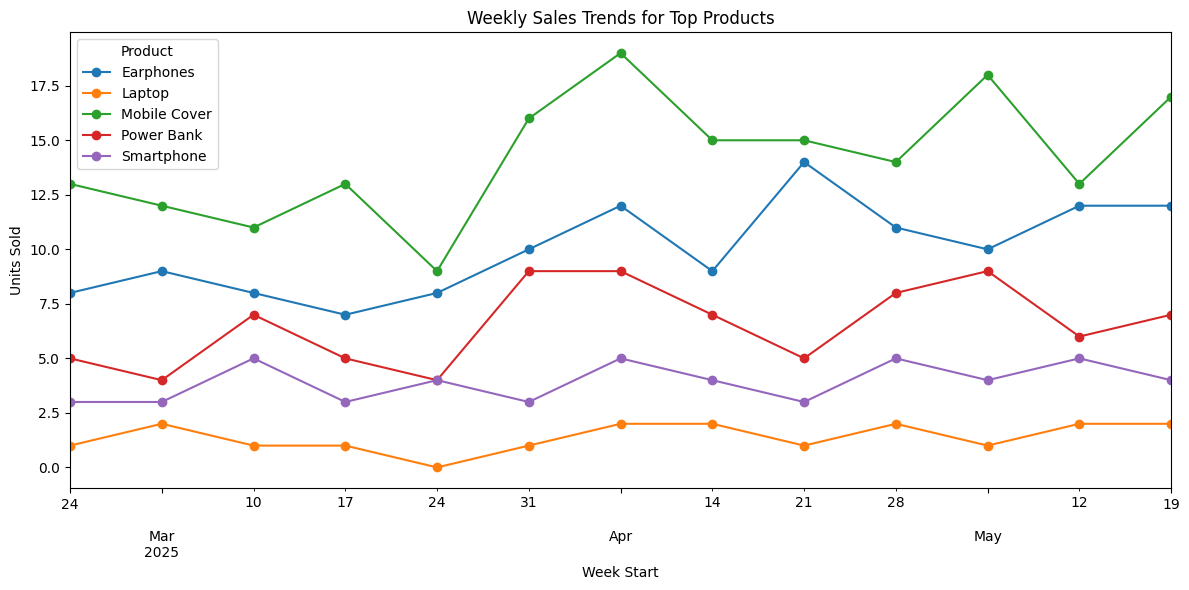

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet2')
products = ['Smartphone', 'Earphones', 'Power Bank', 'Mobile Cover', 'Laptop']
df['Week Start'] = pd.to_datetime(df['Week Start'])
pivot = df[df['Product'].isin(products)].pivot_table(index='Week Start', columns='Product', values='Units_Sold', aggfunc='sum')

pivot.plot(figsize=(12,6), marker='o')
plt.title('Weekly Sales Trends for Top Products')
plt.xlabel('Week Start')
plt.ylabel('Units Sold')
plt.legend(title='Product')
plt.tight_layout()
plt.show()


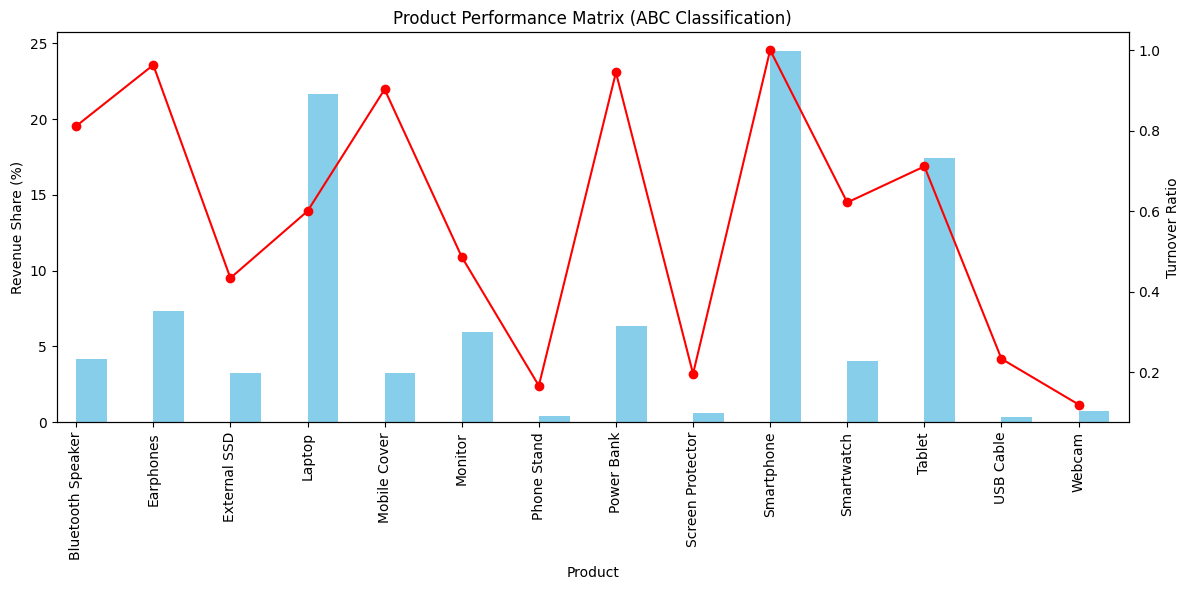

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet1')
grouped = df.groupby('Product').agg({'Revenue (₹)':'sum', 'Stock_Purchased':'sum', 'Stock_Sold':'sum'})
grouped['Revenue_Share'] = grouped['Revenue (₹)'] / grouped['Revenue (₹)'].sum() * 100
grouped['Turnover_Ratio'] = grouped['Stock_Sold'] / grouped['Stock_Purchased']

fig, ax1 = plt.subplots(figsize=(12,6))
grouped['Revenue_Share'].plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
ax2 = ax1.twinx()
grouped['Turnover_Ratio'].plot(kind='line', color='red', marker='o', ax=ax2)
ax1.set_ylabel('Revenue Share (%)')
ax2.set_ylabel('Turnover Ratio')
ax1.set_xlabel('Product')
plt.title('Product Performance Matrix (ABC Classification)')
plt.tight_layout()
plt.show()


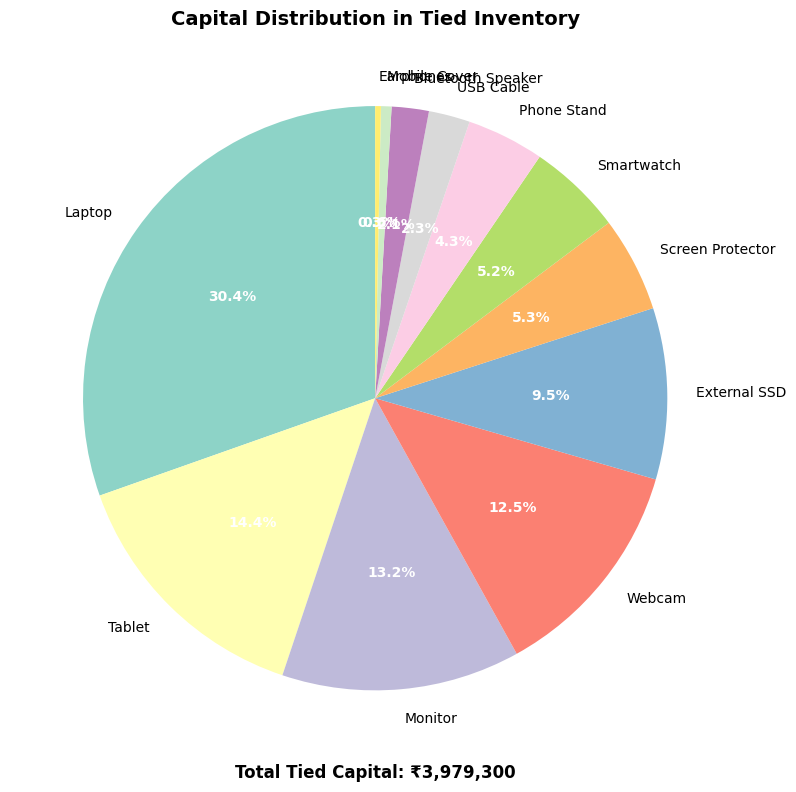


Capital Tied in Inventory Breakdown:
Laptop: ₹1,210,000 (22 units @ ₹55,000)
Tablet: ₹575,000 (23 units @ ₹25,000)
Monitor: ₹525,000 (35 units @ ₹15,000)
Webcam: ₹496,000 (124 units @ ₹4,000)
External SSD: ₹377,000 (58 units @ ₹6,500)
Screen Protector: ₹209,500 (419 units @ ₹500)
Smartwatch: ₹208,000 (26 units @ ₹8,000)
Phone Stand: ₹170,400 (142 units @ ₹1,200)
USB Cable: ₹91,000 (260 units @ ₹350)
Bluetooth Speaker: ₹81,700 (19 units @ ₹4,300)
Mobile Cover: ₹23,200 (29 units @ ₹800)
Earphones: ₹12,500 (5 units @ ₹2,500)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load both sheets
sheet1 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet1')
sheet2 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet2')

# Get remaining stock by product
remaining_stock = sheet1.groupby('Product')['Stock_Remaining'].sum().reset_index()
# Get average base price for each product from sheet2
avg_prices = sheet2.groupby('Product')['Base_Price(₹)'].mean().reset_index()

# Merge data
capital_data = pd.merge(remaining_stock, avg_prices, on='Product')

# Calculate tied capital
capital_data['Tied_Capital'] = capital_data['Stock_Remaining'] * capital_data['Base_Price(₹)']

# Filter out products with zero remaining stock
capital_data = capital_data[capital_data['Stock_Remaining'] > 0].copy()

# Sort by tied capital (descending)
capital_data = capital_data.sort_values('Tied_Capital', ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for pie chart
sizes = capital_data['Tied_Capital']
labels = capital_data['Product']
colors = plt.cm.Set3(np.linspace(0, 1, len(sizes)))

# Create pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  colors=colors, startangle=90)

# Customize chart
ax.set_title('Capital Distribution in Tied Inventory', fontsize=14, fontweight='bold')

# Add total tied capital as subtitle
total_capital = capital_data['Tied_Capital'].sum()
ax.text(0, -1.3, f'Total Tied Capital: ₹{total_capital:,.0f}',
        ha='center', fontsize=12, fontweight='bold')

# Improve text formatting
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print detailed breakdown
print("\nCapital Tied in Inventory Breakdown:")
print("="*50)
for _, row in capital_data.iterrows():
    print(f"{row['Product']}: ₹{row['Tied_Capital']:,.0f} "
          f"({row['Stock_Remaining']} units @ ₹{row['Base_Price(₹)']:,.0f})")

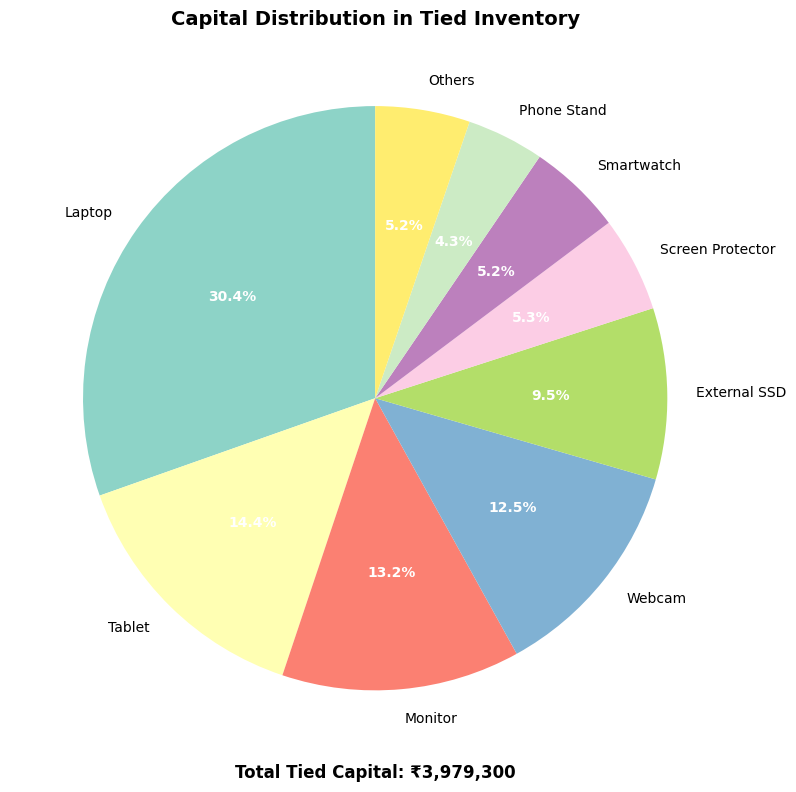


Capital Tied in Inventory Breakdown:
Laptop: ₹1,210,000 (22 units @ ₹55,000)
Tablet: ₹575,000 (23 units @ ₹25,000)
Monitor: ₹525,000 (35 units @ ₹15,000)
Webcam: ₹496,000 (124 units @ ₹4,000)
External SSD: ₹377,000 (58 units @ ₹6,500)
Screen Protector: ₹209,500 (419 units @ ₹500)
Smartwatch: ₹208,000 (26 units @ ₹8,000)
Phone Stand: ₹170,400 (142 units @ ₹1,200)
USB Cable: ₹91,000 (260 units @ ₹350)
Bluetooth Speaker: ₹81,700 (19 units @ ₹4,300)
Mobile Cover: ₹23,200 (29 units @ ₹800)
Earphones: ₹12,500 (5 units @ ₹2,500)

Total Tied Capital: ₹3,979,300


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load both sheets
sheet1 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet1')
sheet2 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet2')

# Step 1: Get total remaining stock by product
remaining_stock = sheet1.groupby('Product')['Stock_Remaining'].sum().reset_index()

# Step 2: Get average base price by product
avg_prices = sheet2.groupby('Product')['Base_Price(₹)'].mean().reset_index()

# Step 3: Merge both dataframes
capital_data = pd.merge(remaining_stock, avg_prices, on='Product')

# Step 4: Calculate tied capital for each product
capital_data['Tied_Capital'] = capital_data['Stock_Remaining'] * capital_data['Base_Price(₹)']

# Step 5: Filter products with non-zero stock
capital_data = capital_data[capital_data['Stock_Remaining'] > 0].copy()

# Step 6: Sort by Tied_Capital
capital_data = capital_data.sort_values('Tied_Capital', ascending=False).reset_index(drop=True)

# Step 7: Group into Top N products and "Others"
top_n = 8
top_data = capital_data.head(top_n).copy()
others_sum = capital_data['Tied_Capital'][top_n:].sum()

if others_sum > 0:
    others_row = pd.DataFrame([{'Product': 'Others', 'Tied_Capital': others_sum}])
    top_data = pd.concat([top_data, others_row], ignore_index=True)

# Step 8: Prepare pie chart data
sizes = top_data['Tied_Capital']
labels = top_data['Product']
colors = plt.cm.Set3(np.linspace(0, 1, len(sizes)))

# Step 9: Create pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)

# Step 10: Customize chart
ax.set_title('Capital Distribution in Tied Inventory', fontsize=14, fontweight='bold')
total_capital = capital_data['Tied_Capital'].sum()
ax.text(0, -1.3, f'Total Tied Capital: ₹{total_capital:,.0f}',
        ha='center', fontsize=12, fontweight='bold')

# Style percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Step 11: Print Breakdown
print("\nCapital Tied in Inventory Breakdown:")
print("="*50)
for _, row in capital_data.iterrows():
    print(f"{row['Product']}: ₹{row['Tied_Capital']:,.0f} "
          f"({row['Stock_Remaining']} units @ ₹{row['Base_Price(₹)']:,.0f})")
print(f"\nTotal Tied Capital: ₹{total_capital:,.0f}")


/tmp/ipython-input-16-72792979.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sheet2['Avg_Selling_Price(₹)'].fillna(sheet2['Base_Price(₹)'], inplace=True)


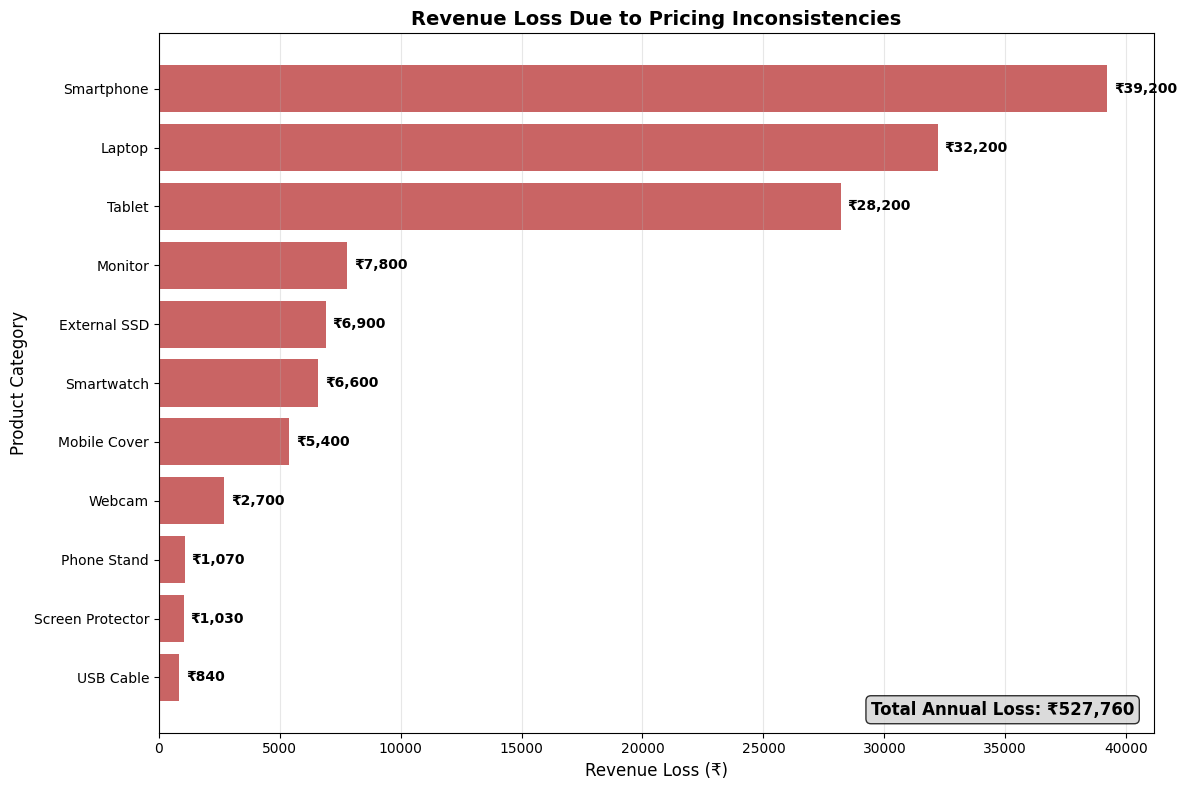


Revenue Loss Summary:
Smartphone: ₹39,200
Laptop: ₹32,200
Tablet: ₹28,200
Monitor: ₹7,800
External SSD: ₹6,900
Smartwatch: ₹6,600
Mobile Cover: ₹5,400
Webcam: ₹2,700
Phone Stand: ₹1,070
Screen Protector: ₹1,030
USB Cable: ₹840

Total Quarterly Loss: ₹131,940
Projected Annual Loss: ₹527,760


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Sheet2 data
sheet2 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet2')

# Clean data - replace '#VALUE!' with NaN and handle missing values
sheet2['Avg_Selling_Price(₹)'] = pd.to_numeric(sheet2['Avg_Selling_Price(₹)'], errors='coerce')

# For rows where Avg_Selling_Price is NaN, assume it equals Base_Price (no discount)
sheet2['Avg_Selling_Price(₹)'].fillna(sheet2['Base_Price(₹)'], inplace=True)

# Calculate revenue loss per transaction
sheet2['Revenue_Loss_Per_Transaction'] = (sheet2['Base_Price(₹)'] - sheet2['Avg_Selling_Price(₹)']) * sheet2['Units_Sold']

# Group by product and sum revenue loss
revenue_loss = sheet2.groupby('Product')['Revenue_Loss_Per_Transaction'].sum().reset_index()

# Sort by revenue loss (descending)
revenue_loss = revenue_loss.sort_values('Revenue_Loss_Per_Transaction', ascending=True)

# Filter out products with zero or negative loss
revenue_loss = revenue_loss[revenue_loss['Revenue_Loss_Per_Transaction'] > 0]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(revenue_loss['Product'], revenue_loss['Revenue_Loss_Per_Transaction'],
               color='firebrick', alpha=0.7)

# Customize chart
ax.set_xlabel('Revenue Loss (₹)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)
ax.set_title('Revenue Loss Due to Pricing Inconsistencies', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.annotate(f'₹{width:,.0f}',
               xy=(width, bar.get_y() + bar.get_height() / 2),
               xytext=(5, 0),
               textcoords="offset points",
               ha='left', va='center', fontsize=10, fontweight='bold')

# Calculate and display total loss
total_loss = revenue_loss['Revenue_Loss_Per_Transaction'].sum()
ax.text(0.98, 0.02, f'Total Annual Loss: ₹{total_loss * 4:,.0f}',
        transform=ax.transAxes, ha='right', va='bottom',
        bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
        fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nRevenue Loss Summary:")
print("="*40)
for _, row in revenue_loss.sort_values('Revenue_Loss_Per_Transaction', ascending=False).iterrows():
    print(f"{row['Product']}: ₹{row['Revenue_Loss_Per_Transaction']:,.0f}")
print(f"\nTotal Quarterly Loss: ₹{total_loss:,.0f}")
print(f"Projected Annual Loss: ₹{total_loss * 4:,.0f}")


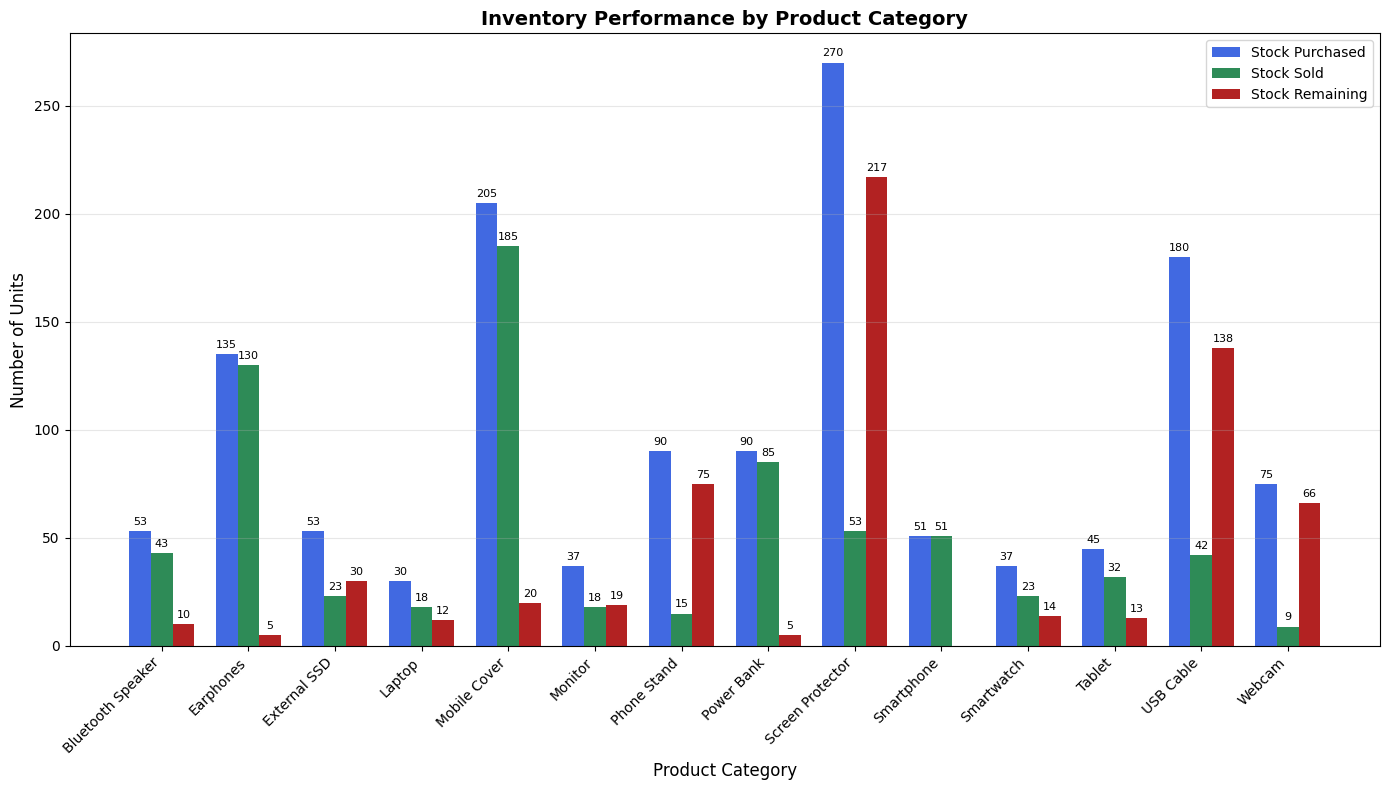

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from Sheet1
sheet1 = pd.read_excel('bdm project data.xlsx', sheet_name='Sheet1')

# Group by Product and sum across months
inv_data = sheet1.groupby('Product').agg({
    'Stock_Purchased': 'sum',
    'Stock_Sold': 'sum'
}).reset_index()

# Calculate Stock_Remaining based on the difference between Stock_Purchased and Stock_Sold
inv_data['Stock_Remaining'] = inv_data['Stock_Purchased'] - inv_data['Stock_Sold']

# Create clustered column chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.25
x_pos = np.arange(len(inv_data['Product']))

# Create bars
bars1 = ax.bar(x_pos - bar_width, inv_data['Stock_Purchased'],
               bar_width, label='Stock Purchased', color='royalblue')
bars2 = ax.bar(x_pos, inv_data['Stock_Sold'],
               bar_width, label='Stock Sold', color='seagreen')
bars3 = ax.bar(x_pos + bar_width, inv_data['Stock_Remaining'],
               bar_width, label='Stock Remaining', color='firebrick')

# Customize chart
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Number of Units', fontsize=12)
ax.set_title('Inventory Performance by Product Category', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(inv_data['Product'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

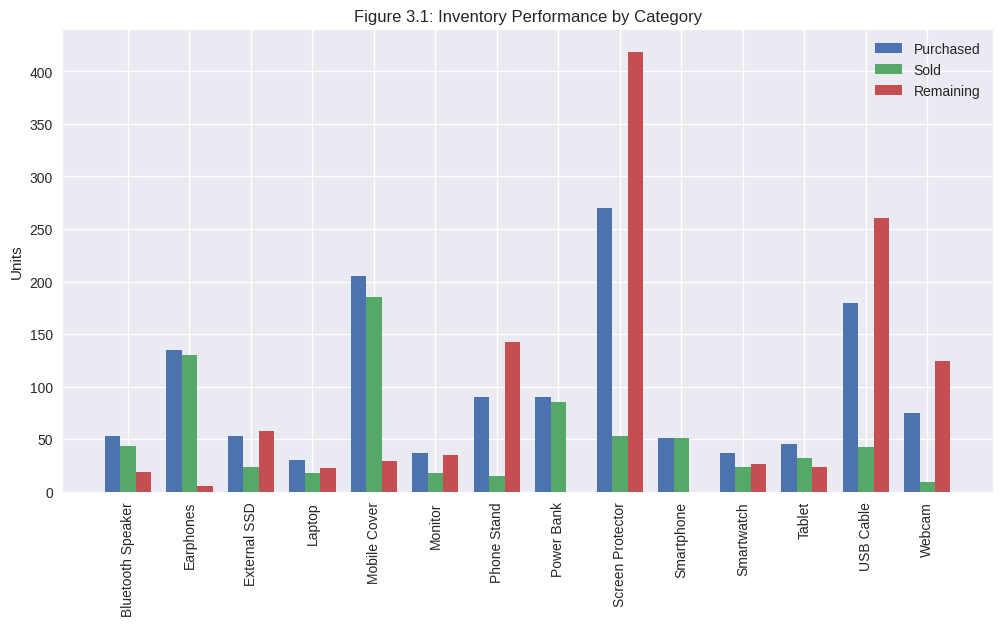

Top 10 Products by Tied Capital:
              Product  Purchased  Sold  Remaining  Avg_Unit_Price  \
3              Laptop         30    18         22    53211.111111   
11             Tablet         45    32         23    24118.750000   
5             Monitor         37    18         35    14566.666667   
13             Webcam         75     9        124     3700.000000   
2        External SSD         53    23         58     6200.000000   
8    Screen Protector        270    53        419      480.566038   
10         Smartwatch         37    23         26     7713.043478   
6         Phone Stand         90    15        142     1128.666667   
12          USB Cable        180    42        260      330.000000   
0   Bluetooth Speaker         53    43         19     4316.744186   

    Capital_Tied  
3   1.170644e+06  
11  5.547312e+05  
5   5.098333e+05  
13  4.588000e+05  
2   3.596000e+05  
8   2.013572e+05  
10  2.005391e+05  
6   1.602707e+05  
12  8.580000e+04  
0   8.201814e+04 

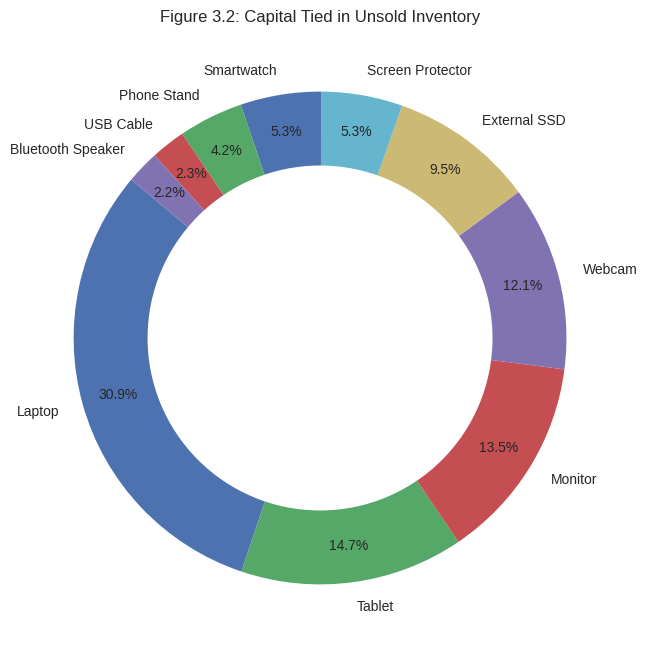

/tmp/ipython-input-867440590.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.legend(); ax.set_xticklabels(rev["Product"], rotation=90)
/tmp/ipython-input-867440590.py:14: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.savefig(f"{name}.png", dpi=300, bbox_inches="tight")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


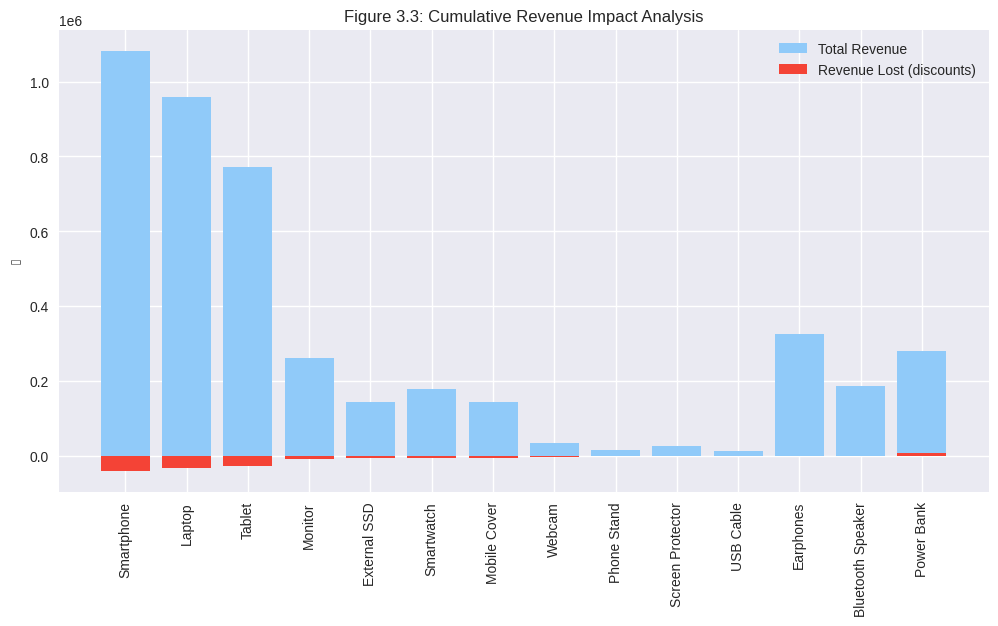

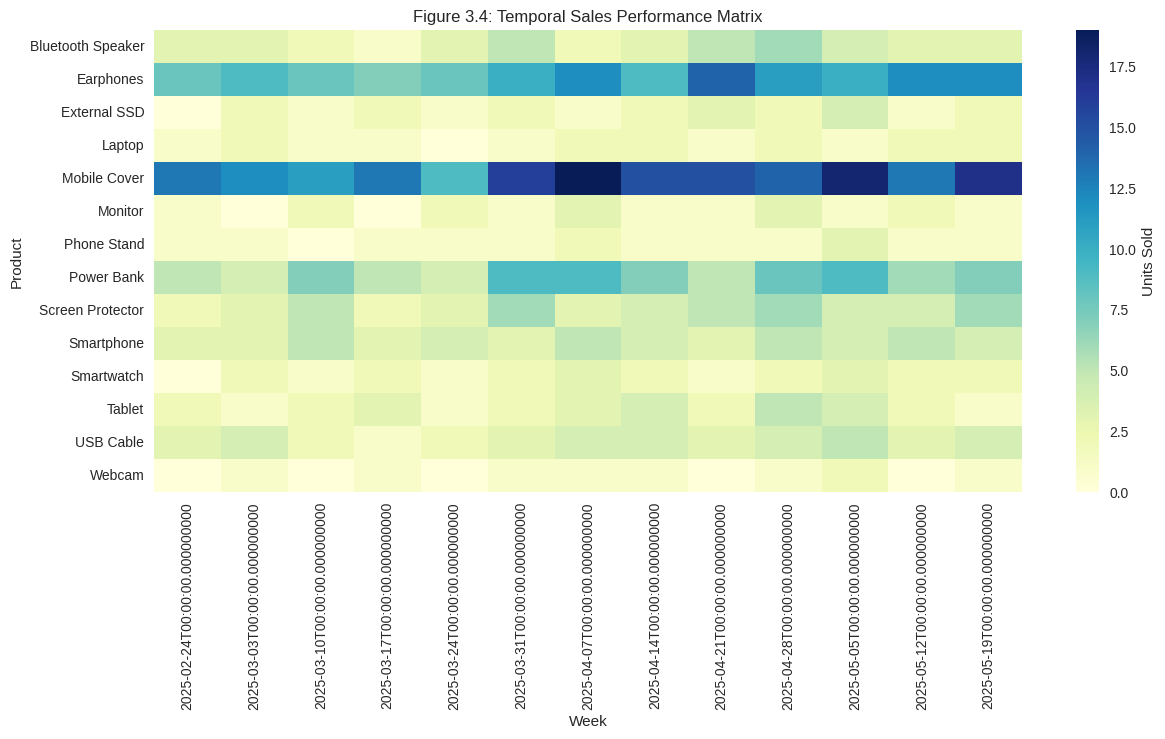

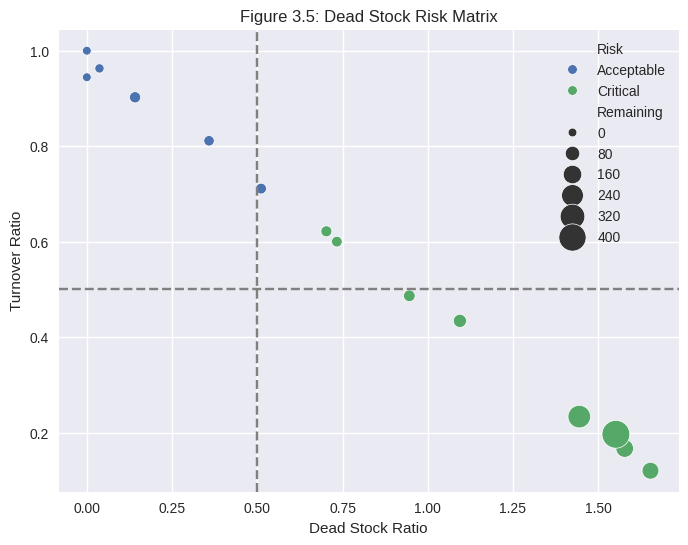

/tmp/ipython-input-867440590.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_rev.index, rotation=90)
/tmp/ipython-input-867440590.py:14: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.savefig(f"{name}.png", dpi=300, bbox_inches="tight")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


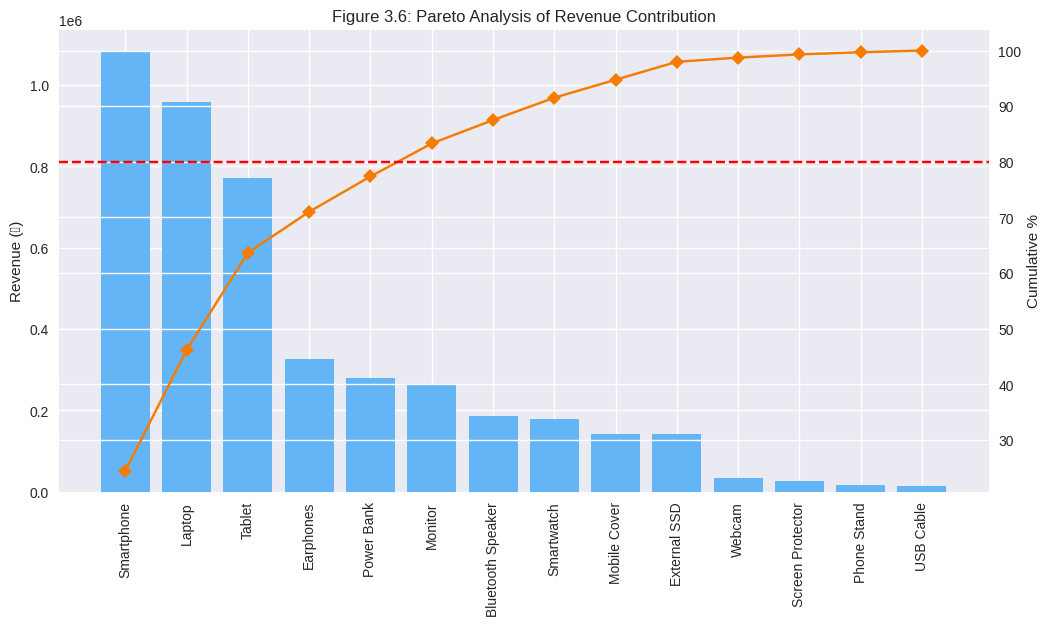

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/tmp/ipython-input-867440590.py:14: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.savefig(f"{name}.png", dpi=300, bbox_inches="tight")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


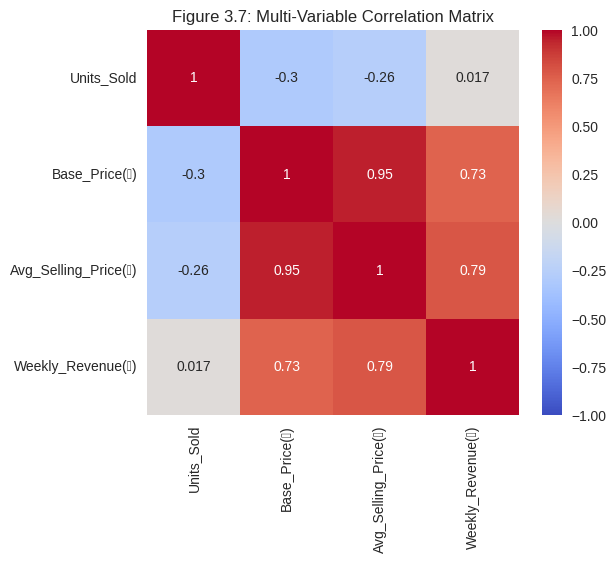

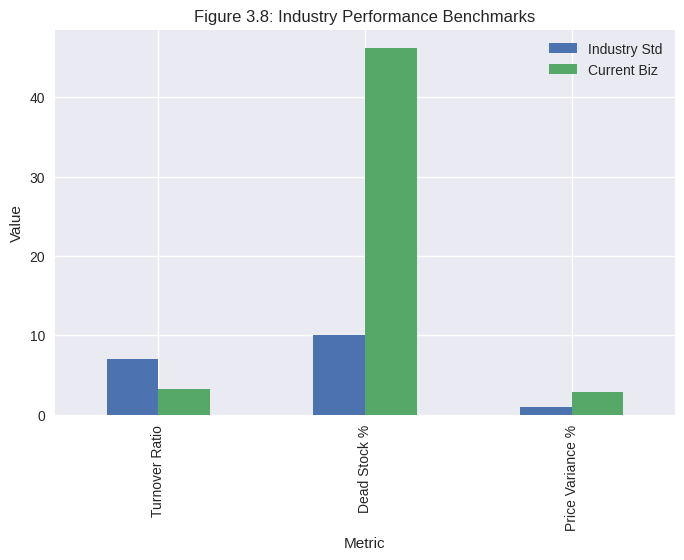

In [ ]:
# -------- Common imports & file path ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")

FILE = "bdm project data (1).xlsx"          # <-- change if the file name differs
SAVE  = True                              # toggle to True = .png files saved

# Helper to save / show ------------------------------------------------------
def finish(fig, name):
    if SAVE:
        fig.savefig(f"{name}.png", dpi=300, bbox_inches="tight")
    plt.show()


# ========== Figure 3.1 — Inventory Performance by Category =================
sheet1 = pd.read_excel(FILE, sheet_name="Sheet1")

inv = (sheet1.groupby("Product")
               .agg(Purchased=("Stock_Purchased","sum"),
                    Sold     =("Stock_Sold","sum"),
                    Remaining=("Stock_Remaining","sum"))
               .reset_index())

fig, ax = plt.subplots(figsize=(12,6))
width = 0.25
x = np.arange(len(inv))
ax.bar(x-width,  inv["Purchased"],  width, label="Purchased")
ax.bar(x        , inv["Sold"]     , width, label="Sold")
ax.bar(x+width , inv["Remaining"], width, label="Remaining")
ax.set_xticks(x); ax.set_xticklabels(inv["Product"], rotation=90)
ax.set_ylabel("Units"); ax.set_title("Figure 3.1: Inventory Performance by Category")
ax.legend(); finish(fig, "fig3_1_inventory_performance")


# ========== Figure 3.2 — Capital Tied in Unsold Inventory ==================
# average realised unit price (Revenue / Sold) used as proxy for cost
# Ensure 'Revenue (₹)' is numeric and handle potential errors
sheet1['Revenue (₹)'] = pd.to_numeric(sheet1['Revenue (₹)'], errors='coerce').fillna(0)

# Calculate total revenue and sold units per product directly from sheet1
product_revenue_sold = sheet1.groupby("Product").agg(
    Total_Revenue=('Revenue (₹)', 'sum'),
    Total_Sold=('Stock_Sold', 'sum')
).reset_index()

# Calculate average unit price, handling division by zero
product_revenue_sold['Avg_Unit_Price'] = (product_revenue_sold['Total_Revenue'] / product_revenue_sold['Total_Sold']).replace([np.inf, -np.inf], np.nan).fillna(0)

# Merge average unit price with inventory data
inv = pd.merge(inv, product_revenue_sold[['Product', 'Avg_Unit_Price']], on='Product', how='left')
inv['Avg_Unit_Price'] = inv['Avg_Unit_Price'].fillna(0) # Handle products not in revenue data

inv["Capital_Tied"]   = inv["Remaining"] * inv["Avg_Unit_Price"]
top10 = inv.nlargest(10, "Capital_Tied").reset_index(drop=True) # Reset index

# Explicitly convert to numpy array and list
sizes = top10["Capital_Tied"].to_numpy()
labels = top10["Product"].tolist()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, # Use the converted sizes
       labels=labels, # Use the converted labels
       autopct="%.1f%%", startangle=140, pctdistance=0.85)
ax.set_title("Figure 3.2: Capital Tied in Unsold Inventory")
centre_circle = plt.Circle((0,0),0.70,fc='white'); fig.gca().add_artist(centre_circle)
finish(fig, "fig3_2_capital_tied")


# ========== Figure 3.3 — Cumulative Revenue Impact Analysis ===============
sheet2 = pd.read_excel(FILE, sheet_name="Sheet2")
sheet2["Revenue_Loss"] = (sheet2["Base_Price(₹)"] - sheet2["Avg_Selling_Price(₹)"]) \
                         * sheet2["Units_Sold"]

rev = (sheet2.groupby("Product")
               .agg(Loss=("Revenue_Loss","sum"),
                    Revenue=("Weekly_Revenue(₹)","sum"))
               .reset_index()
               .sort_values("Loss", ascending=False))

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(rev["Product"], rev["Revenue"], label="Total Revenue", color="#90caf9")
ax.bar(rev["Product"], -rev["Loss"],   label="Revenue Lost (discounts)", color="#f44336")
ax.set_ylabel("₹"); ax.set_title("Figure 3.3: Cumulative Revenue Impact Analysis")
ax.legend(); ax.set_xticklabels(rev["Product"], rotation=90)
finish(fig, "fig3_3_revenue_impact")


# ========== Figure 3.4 — Temporal Sales Performance Matrix ================
wk_prod = sheet2.pivot_table(index="Week Start",
                             columns="Product",
                             values="Units_Sold",
                             aggfunc="sum").fillna(0)

fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(wk_prod.T, cmap="YlGnBu", ax=ax, cbar_kws={"label":"Units Sold"})
ax.set_title("Figure 3.4: Temporal Sales Performance Matrix")
ax.set_xlabel("Week"); ax.set_ylabel("Product")
finish(fig, "fig3_4_sales_matrix")


# ========== Figure 3.5 — Dead Stock Risk Matrix ===========================
# Risk = (Remaining ≥50% of Purchased) & (Turnover Ratio <0.5)
inv["Turnover"]   = inv["Sold"] / inv["Purchased"]
inv["DeadStock%"] = inv["Remaining"] / inv["Purchased"]
inv["Risk"] = np.select(
        [ (inv["DeadStock%"]>=0.7),
          (inv["DeadStock%"]>=0.5) & (inv["Turnover"]<0.5) ],
        [ "Critical", "High" ], default="Acceptable")

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=inv, x="DeadStock%", y="Turnover",
                hue="Risk", size="Remaining", sizes=(40,400), ax=ax)
ax.axvline(0.5, ls="--", c="grey"); ax.axhline(0.5, ls="--", c="grey")
ax.set_title("Figure 3.5: Dead Stock Risk Matrix")
ax.set_xlabel("Dead Stock Ratio"); ax.set_ylabel("Turnover Ratio")
finish(fig, "fig3_5_deadstock_matrix")


# ========== Figure 3.6 — Pareto Analysis of Revenue Contribution ==========
monthly_rev = sheet1.groupby("Product")["Revenue (₹)"].sum().sort_values(ascending=False)
cum_pct = monthly_rev.cumsum()/monthly_rev.sum()*100

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(monthly_rev.index, monthly_rev.values, color="#64b5f6")
ax1.set_ylabel("Revenue (₹)")
ax1.set_xticklabels(monthly_rev.index, rotation=90)

ax2 = ax1.twinx()
ax2.plot(monthly_rev.index, cum_pct, color="#f57c00", marker="D")
ax2.set_ylabel("Cumulative %")
ax2.axhline(80, color="red", ls="--")
ax1.set_title("Figure 3.6: Pareto Analysis of Revenue Contribution")
finish(fig, "fig3_6_pareto")


# ========== Figure 3.7 — Multi-Variable Correlation Matrix ================
# selecting key numerical columns from Sheet2
num_cols = ["Units_Sold", "Base_Price(₹)", "Avg_Selling_Price(₹)",
            "Weekly_Revenue(₹)"]
corr = sheet2[num_cols].corr()

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
ax.set_title("Figure 3.7: Multi-Variable Correlation Matrix")
finish(fig, "fig3_7_correlation")


# ========== Figure 3.8 — Industry Performance Benchmarks ==================
# Benchmarks entered manually (example values)
bench = pd.DataFrame({
    "Metric":["Turnover Ratio","Dead Stock %","Price Variance %"],
    "Industry Std":[7, 10, 1],       # illustrative standards
    "Current Biz":[3.2, 46.2, 2.91]   # from our earlier analysis
})

fig, ax = plt.subplots(figsize=(8,5))
bench.plot.bar(x="Metric", ax=ax)
ax.set_ylabel("Value"); ax.set_title("Figure 3.8: Industry Performance Benchmarks")
finish(fig, "fig3_8_benchmarks")